<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>Gradient Boost Classification</b></p>

**About Dataset**

Machine Learning Model to Predict Clicks on Ads

* **Daily Time Spent on Site**: consumer time on site in minutes
* **Age**: cutomer age in years
* **Area Income**: Avg. Income of geographical area of consumer
* **Daily Internet Usage**: Avg. minutes a day consumer is on the internet
* **Ad Topic Line**: Headline of the advertisement
* **City**: City of consumer
* **Male**: Whether or not consumer was male
* **Country**: Country of consumer
* **Timestamp**: Time at which consumer clicked on Ad or closed window
* **Clicked on Ad**: 0 or 1 indicated clicking on Ad

# <font color='steelblue'> <b>Importing Libraries</b><font color='black'>  

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='steelblue'> <b>Loading The Dataset</b><font color='black'>

In [203]:
df = pd.read_csv("advertising2.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [204]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
983,82.79,32,54429.17,234.81,Distributed fault-tolerant service-desk,Lake Zacharyfurt,1,Brunei Darussalam,2016-02-24 10:36:43,0
765,51.58,33,49822.78,115.91,Vision-oriented system-worthy forecast,Johnsontown,0,Brunei Darussalam,2016-04-24 13:46:10,1
355,87.09,36,57737.51,221.98,Synergized coherent interface,Luischester,1,Reunion,2016-04-21 16:10:50,0
250,76.70,36,71136.49,222.25,Open-source coherent monitoring,West Russell,0,Ecuador,2016-06-12 05:31:19,0
383,74.63,26,51975.41,235.99,Enhanced asymmetric installation,New Traceystad,1,Dominican Republic,2016-07-05 20:16:13,0
861,68.25,29,70324.80,220.08,Phased fault-tolerant definition,Wagnerchester,0,Greenland,2016-02-15 16:18:49,0
284,47.51,51,53700.57,130.41,Managed well-modulated collaboration,Bethburgh,1,American Samoa,2016-05-21 01:36:16,1
114,69.00,32,72683.35,221.21,Virtual composite model,Port Susan,1,Trinidad and Tobago,2016-02-11 04:37:34,0
550,75.80,36,71222.40,224.90,Multi-layered fresh-thinking neural-net,East Michaelland,0,Belize,2016-01-21 04:30:43,0
504,66.12,49,39031.89,113.80,Stand-alone motivating moratorium,South Alexisborough,0,Cote d'Ivoire,2016-02-15 07:27:41,1


# <font color='steelblue'> <b>Understanding Data & EDA</b><font color='black'>

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [207]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [208]:
df["Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [209]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [210]:
cat_features = df.select_dtypes(include="object").columns
cat_features

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [211]:
unique_values(df, cat_features)

Column: Ad Topic Line
------------------------------
Unique Values (1000): ['Cloned 5thgeneration orchestration' 'Monitored national standardization'
 'Organic bottom-line service-desk'
 'Triple-buffered reciprocal time-frame' 'Robust logistical utilization'
 'Sharable client-driven software' 'Enhanced dedicated support'
 'Reactive local challenge' 'Configurable coherent function'
 'Mandatory homogeneous architecture' 'Centralized neutral neural-net'
 'Team-oriented grid-enabled Local Area Network'
 'Centralized content-based focus group'
 'Synergistic fresh-thinking array' 'Grass-roots coherent extranet'
 'Persistent demand-driven interface' 'Customizable multi-tasking website'
 'Intuitive dynamic attitude'
 'Grass-roots solution-oriented conglomeration'
 'Advanced 24/7 productivity' 'Object-based reciprocal knowledgebase'
 'Streamlined non-volatile analyzer'
 'Mandatory disintermediate utilization'
 'Future-proofed methodical protocol' 'Exclusive neutral parallelism'
 'Public-key for

In [212]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(feature, df[feature].nunique())
        
        
# The unique counts of categorical features are being identified.
# Categorical features with a high number of unique observations will be dropped.
# Tree-based models tend to assign excessive importance to features with many unique categories.
# Additionally, features with few unique observations fail to provide meaningful learning to the model.

Ad Topic Line 1000
City 969
Country 237
Timestamp 1000


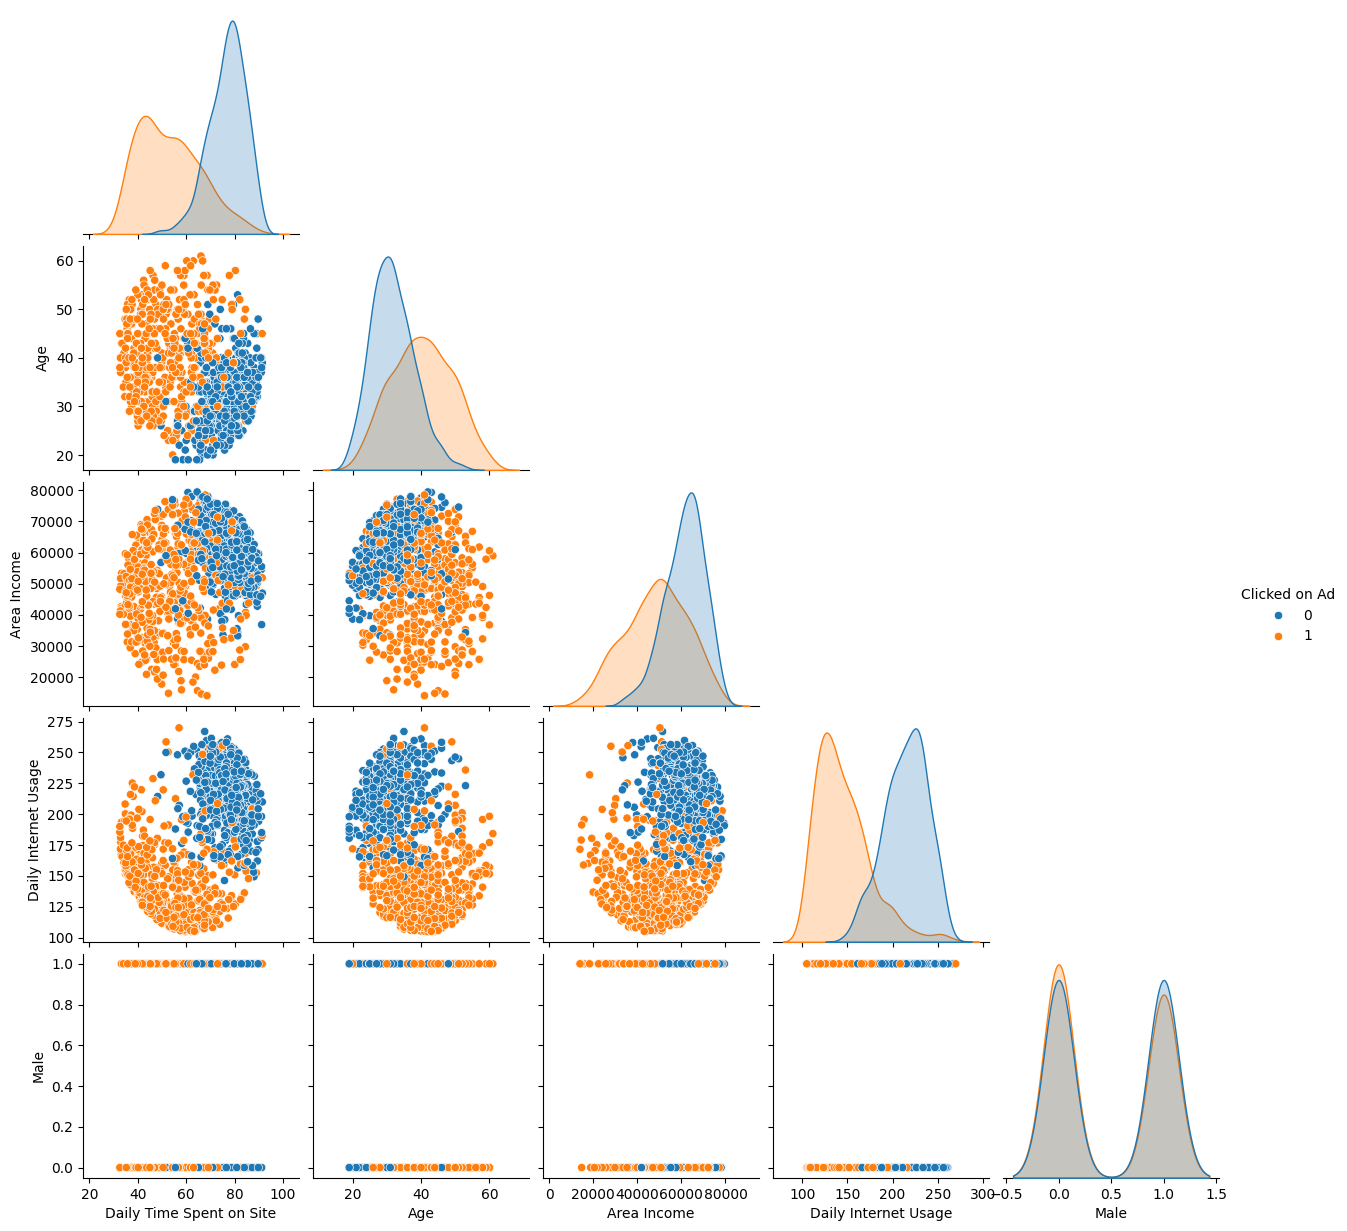

In [213]:
sns.pairplot(df, hue="Clicked on Ad", corner=True);

# <font color='steelblue'> <b>Modeling</b><font color='black'>

## <font color='#skyblue'> <b>Train | Test Split</b><font color='black'>

In [216]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = df["Clicked on Ad"]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## <font color='#skyblue'> <b>Gradient Boosting Modeling</b><font color='black'>

[Sklearn: Gradient Boost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

**Gradient Boosting Model Process**

Gradient Boosting models are based on the principle of sequentially improving weak learners (e.g., decision trees) that are prone to errors, thus creating a strong model. In this process, the errors (residuals) of each learner become the target for the next learner to improve upon. Below is a step-by-step explanation of this process:

**1. Initial Prediction:**
- In the first step, the model makes an initial prediction for all observations. This is usually calculated by taking the logarithm of the ratio of the positive class (e.g., those with heart disease).
- In your example, with 4 positive and 2 negative examples, log(4/2) = 0.6931.

**2. Calculation of the First Score Using the Logistic Function:**
- This ratio is used as part of the logistic function, and a probability value is calculated for each observation.
- This value is typically calculated using the formula 1 / (1 + e^(-log_odds)) and is approximately 0.67. This means that initially, all observations are classified as 1 (heart disease present), because it is simply greater than 0.5.

**Logistic Function and Calculation of the First Score**

In Gradient Boosting models, the initial scores are typically calculated based on the logit transformation of the probabilities. These scores are then converted into probabilities through the logistic function.

The logit transformation is a value computed from the ratio of positive examples, and it is used in the output layer of logistic regression models. The calculation of the initial score is done using the following formula:

\\[ \text{Logit}(p) = \log\left(\frac{p}{1-p}\right) \\]

Where \( p \) is the probability of the positive class. This logit value is then converted into a probability using the logistic function:

\\[ p = \frac{1}{1 + e^{-\text{Logit}(p)}} \\]

This formula shows how the probability of an event is calculated based on \( e \) (Euler's number) and the negative of the logit transformation. This is a fundamental approach in classification problems and is used in iterative improvement processes like those in Gradient Boosting algorithms.

**3. Calculation of the Residuals:**
- Then, the difference between the actual value of each observation and the initial predictions, known as the residuals, is calculated.
- These residuals represent the errors that need to be reduced for the model to make better predictions.

**4. Creation of the First Decision Tree:**
- The first weak learner (decision tree) is created to reduce these residuals as much as possible. Each branch of the tree selects the split that is most effective in reducing the residuals (similar to a pulse).

**5. Application of the Learning Rate and Contribution of Trees:**
- The contribution of each tree is multiplied by a specific learning rate (usually a small number, e.g., 0.1), which is a regularization technique to prevent the model from overfitting.
- The results are then added to the initial model to generate new predictions.

**6. Iterative Improvement:**
- This process is repeated for a specified number of iterations or until a stopping criterion is met. Each iteration focuses on reducing the remaining errors (new residuals).

**7. Creation of the Final Model:**
- Eventually, the contributions of all trees are summed to create the final model. This model is then used to make predictions on new data.

**Initial Score and Classification**
The initial score represents the probability of an observation belonging to the positive class (e.g., "heart disease present" in your example). This score typically takes a value between 0 and 1, and classification is done based on this probability with a thresold. The threshold is typically set to 0.5.


---

**Gradient Boosting Working Principle and Formulas**

1. **Initial Model and Predictions**:
   - The algorithm typically starts with a simple initial prediction. For classification, this is usually calculated as the log(odds) of the probability of the positive class.
     $$ F_0(x) = \log\left(\frac{p}{1-p}\right) $$

2. **Error Derivatives (Calculation of Residuals)**:
   - In each iteration, the difference between the model's outputs and the actual values (residuals) is calculated. The residuals are the derivative of the loss function.
     $$ r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)} $$

3. **Training of Weak Learner**:
   - A weak learner (usually a decision tree) is trained using the residuals as the target.

4. **Determining the Learner's Contribution and Updating**:
   - The contribution of each weak learner is determined by a learning rate and the model is updated accordingly.
     $$ \gamma_m = \arg\min_{\gamma} \sum_{i=1}^{N} L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i)) $$
     $$ F_m(x) = F_{m-1}(x) + \nu \gamma_m h_m(x) $$

5. **Model Update**:
   - This process is repeated for the specified number of iterations.

6. **Termination of the Model**:
   - Once the iterations are completed, the final model isused for predictions.


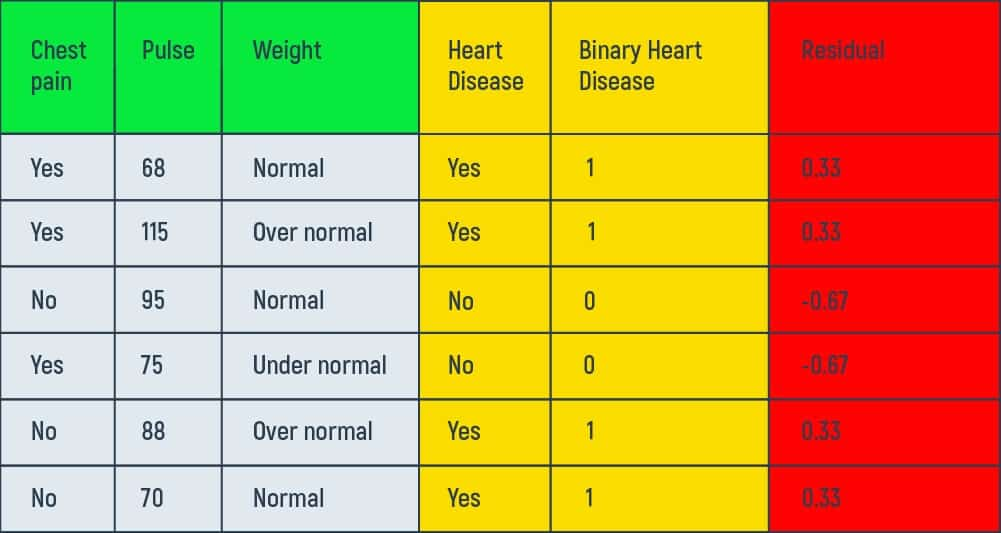

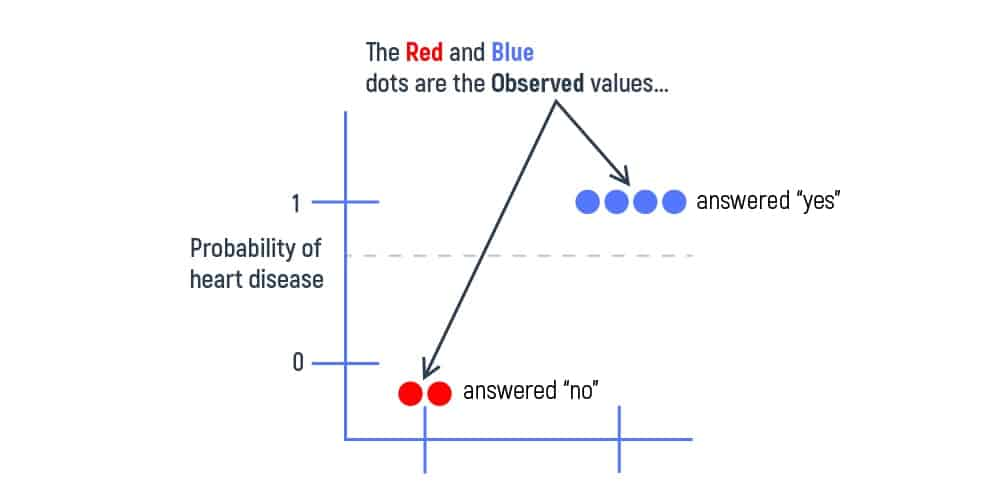

Formula to calculate the starting value

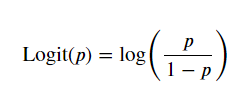

---

Formula to calculate probability

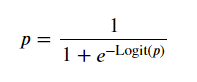

In [226]:
np.log(4/2) # probability of 1

0.6931471805599453

In [227]:
# prediction probability
tah_ol=(np.e**np.log(4/2)) /(1+np.e**np.log(4/2))
tah_ol

0.6666666666666666

In [228]:
1 - tah_ol # residual probability of 1

0.33333333333333337

In [229]:
0 - tah_ol # residual probability of 0

-0.6666666666666666

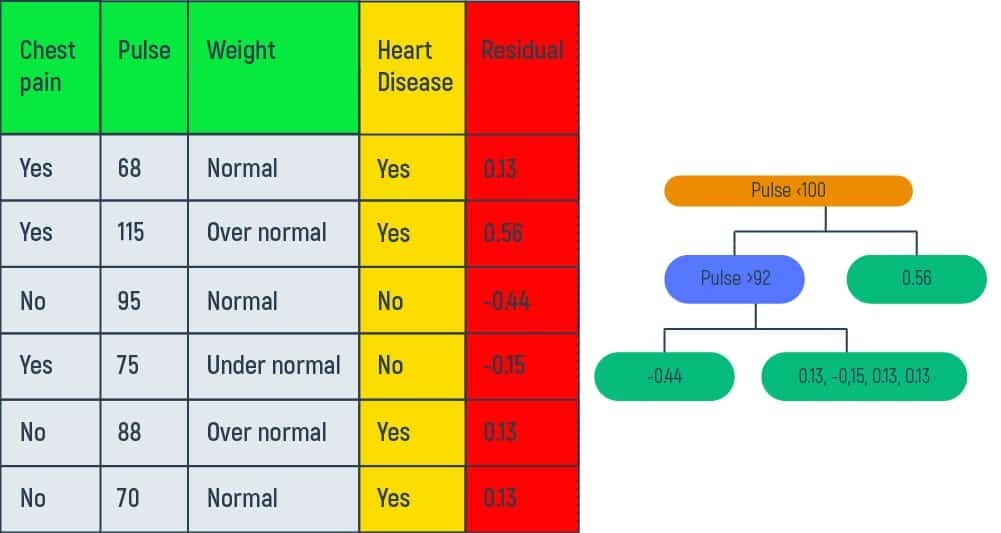

In [231]:
grad_model = GradientBoostingClassifier(random_state=42)
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [232]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [233]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## <font color='#skyblue'> <b>Cross Validation</b><font color='black'>

In [235]:
model = GradientBoostingClassifier(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.952222
train_accuracy     0.999012
test_precision     0.958870
train_precision    1.000000
test_recall        0.945960
train_recall       0.997997
test_f1            0.951603
train_f1           0.998997
test_roc_auc       0.987972
train_roc_auc      0.999994
dtype: float64

## <font color='#skyblue'> <b>GridSearchCV</b><font color='black'>

**Main Hyperparameters**

* **loss:**
  - **Description:** The loss function used in the model optimization. 'Deviance' (log-loss) is commonly used for classification, and 'squared_error' is typically used for regression.
  - **Default:** 'deviance'
  - **Effect:** Choosing the appropriate loss function improves the model's accuracy.

* **learning_rate:**
  - **Description:** Determines the contribution of each weak learner (tree) to the model.
  - **Default:** 0.1
  - **Effect:** A lower learning rate (e.g., 0.01) results in a more stable model with better generalization but requires more iterations.

* **n_estimators:**
  - **Description:** The total number of boosting stages (trees).
  - **Default:** 100
  - **Effect:** More iterations generally improve performance but may increase training time and the risk of overfitting.

---

**Tree Configuration**

* **max_depth:**
  - **Description:** Determines the maximum depth of each tree. Controls the complexity and capacity of the model.
  - **Default:** 3
  - **Effect:** Deeper trees learn more complex relationships but increase the risk of overfitting. Lower values may improve generalization capacity.

* **min_samples_split:**
  - **Description:** The minimum number of samples required to split a node.
  - **Default:** 2
  - **Effect:** A higher value makes the model more conservative and helps prevent overfitting.

* **min_samples_leaf:**
  - **Description:** The minimum number of samples required in each leaf.
  - **Default:** 1
  - **Effect:** Higher values reduce overfitting.

* **max_features:**
  - **Description:** The maximum number of features to consider when splitting.
  - **Default:** 'sqrt' (classification) or 'auto' (regression)
  - **Effect:** A lower value can reduce the model's variance but may limit its learning capacity.

---

**Data Subsampling**

* **subsample:**
  - **Description:** The proportion of samples to be used in each iteration (0 < subsample <= 1).
  - **Default:** 1.0
  - **Effect:** Lower values prevent overfitting and increase generalization capacity. For example, 0.5 or 0.8 typically yields good results.

* **min_impurity_decrease:**
  - **Description:** The minimum impurity decrease required for a split.
  - **Default:** 0.0
  - **Effect:** Higher values make the model less complex.

---

**Performance and Optimization**

* **criterion:**
  - **Description:** The criterion used to evaluate splits.
  - **Default:** 'friedman_mse'
  - **Effect:** 'friedman_mse' typically provides better performance.

---

**Hyperparameter Summary Table**

| **Parameter**         | **Description**                                              | **Default**       |
|-----------------------|--------------------------------------------------------------|-------------------|
| **loss**              | The loss function used for model optimization               | 'deviance'        |
| **learning_rate**     | The learning rate                                             | 0.1               |
| **n_estimators**      | The number of trees                                            | 100               |
| **max_depth**         | Maximum depth of each tree                                   | 3                 |
| **min_samples_split** | The minimum number of samples required to split a node      | 2                 |
| **min_samples_leaf**  | The minimum number of samples required in each leaf         | 1                 |
| **max_features**      | The maximum number of features considered for splitting     | 'sqrt' or 'auto'  |
| **subsample**         | The subsampling rate                                         | 1.0               |
| **criterion**         | The criterion used to evaluate splits                       | 'friedman_mse'    |

---

**Gradient Boosting Tuning Tips**

1. **Balance Between Tree Count and Learning Rate:**
   - If a lower learning rate (e.g., 0.01) is chosen, more trees (n_estimators) are needed.
   - A higher learning rate may be sufficient with fewer trees.

2. **Subsample:**
   - A value like 0.8 typically reduces variance and improves model performance.

3. **Max Depth:**
   - A lower depth (2 or 3) usually provides better generalization.

4. **Cross-Validation:**
   - Use grid search or random search for hyperparameter optimization.

5. **Early Stopping:**
   - Apply early stopping to prevent overfitting.


In [238]:
gb_model = GradientBoostingClassifier(random_state = 42)

In [239]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "subsample": [0.5, 0.8],
    "max_features": [None, 2, 34],
    "learning_rate": [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

In [240]:
gb_grid = GridSearchCV(gb_model,
                       param_grid,
                       scoring="f1",
                       verbose=2,
                       n_jobs=-1,
                       return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [241]:
# We did not give the cv parameter to GridSearchhCV above. That's why the Default state cv=5 was used.

In [242]:
gb_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_features=2, n_estimators=300,
                           random_state=42, subsample=0.5)

In [243]:
gb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 2,
 'n_estimators': 300,
 'subsample': 0.5}

In [244]:
gb_grid.best_score_

0.964535348901264

## <font color='#skyblue'> <b>Model Performance</b><font color='black'>

In [246]:
eval_metric(gb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[451   5]
 [ 13 431]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



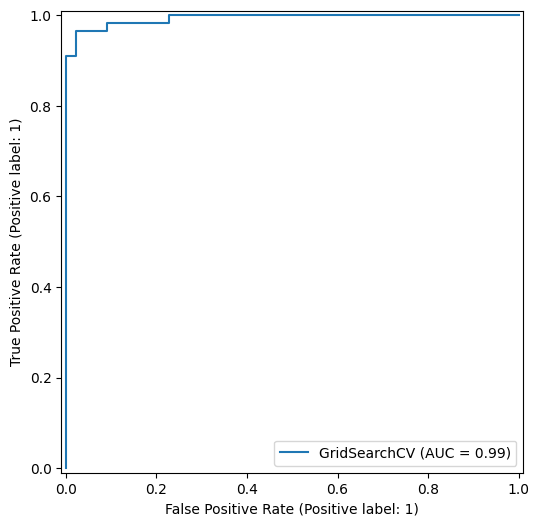

In [247]:
RocCurveDisplay.from_estimator(gb_grid, X_test, y_test);

In [248]:
y_pred = gb_grid.predict(X_test)
y_pred_proba = gb_grid.predict_proba(X_test)

# process of assigning metrics to variables for comparison
gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

## <font color='#skyblue'> <b>Feature Importance</b><font color='black'>

In [250]:
model = GradientBoostingClassifier(learning_rate=0.01, max_features=2, n_estimators=300,
                           random_state=42, subsample=0.5)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance", ascending=False)
grad_imp_feats

,grad_importance
Daily Internet Usage,0.469223
Daily Time Spent on Site,0.341590
Area Income,0.103870
Age,0.084627
Male,0.000689


**Future Importance Values with AdaBoost**

---

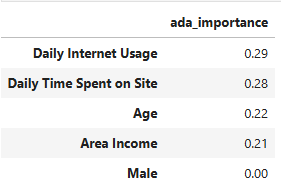

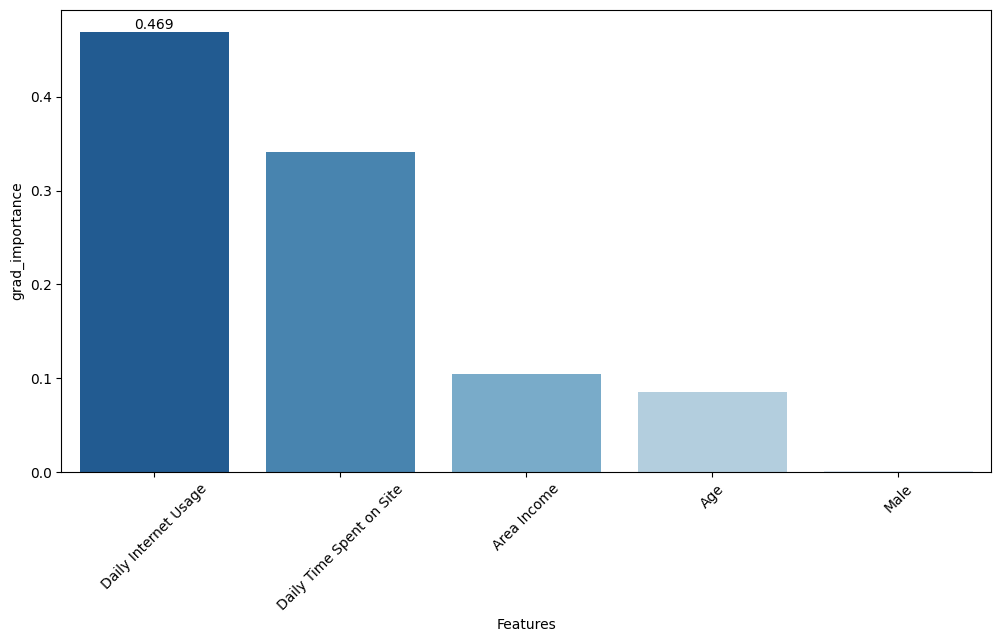

In [252]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grad_imp_feats,
                 x=grad_imp_feats.index,
                 y='grad_importance',
                 palette='Blues_r'
                )

ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=45)
plt.xlabel("Features");

<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>